# 因子分析

### 因子分析(factor analysis)
是指研究从变量群中提取共性因子的统计技术。因子分析是简化、分析高维数据的一种统计方法。
因子分析旨在用少量（不可观测）的潜在变量或因子描述可观测变量。因子分析也称为公因子分析和探索性因子分析。这些因子可以定义为观测变量的线性组合，旨在解释观测变量中的共有变异。**因子分析的目的从具有错综复杂关系的变量中，找出数量较少的几个公因子来描述原始的变量，并且尽量减少信息的损失。**


因子分析有两个核心问题，一是如何构造因子变量，二是如何对因子变量进行命名解释。

**因子分析的一般步骤**：
①将数据进行标准化处理；
②计算相关系数矩阵C；
③计算相关系数矩阵C的特征值 r 和特征向量 U；
④确定公共因子个数k；
⑤构造初始因子载荷矩阵,其中U为r的特征向量；
⑥建立因子模型；
⑦对初始因子载荷矩阵A进行旋转变换，旋转变换是使初始因子载荷矩阵结构简化，关系明确，使得因子变量更具有可解释性，如果初始因子不相关，可以用方差极大正交旋转，如果初始因子间相关，可以用斜交旋转，经过旋转后得到比较理想的新的因子载荷矩阵A'；
⑧将因子表示成变量的线性组合，其中的系数可以通过加权最小二乘法得到；
⑨计算因子得分.

### 实验数据
本次所用的实验数据是1996年全国30个省市自治区经济发展基本情况，其中X1- GDP ，X2-居民消费水平，X3-固定资产投资，X4-职工平均工资，X5-货物周转量，X6-居民消费价格指数，X7-商品零售价格指数，X8-工业总产值

### 手动实现因子分析

In [1]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings("ignore")

In [2]:
#导入数据集
data=pd.read_excel('factor analysis.xls',index_col='省市')

In [3]:
#数据预览
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8
省市,,,,,,,,
北京,1394.89,2505,519.01,8144,373.9,117.3,112.6,843.43
天津,920.11,2720,345.46,6501,342.8,115.2,110.6,582.51
河北,2849.52,1258,704.87,4839,2033.3,115.2,115.8,1234.85
山西,1092.48,1250,290.90,4721,717.3,116.9,115.6,697.25
内蒙,832.88,1387,250.23,4134,781.7,117.5,116.8,419.39


In [41]:
#将原始数据标准化处理
data=(data-data.mean())/data.std() 

X1    2.220446e-17
X2   -7.401487e-18
X3   -6.846375e-17
X4    9.251859e-18
X5   -4.810966e-17
X6   -9.621933e-17
X7   -3.700743e-17
X8   -4.070818e-17
dtype: float64

In [5]:
#计算数据的相关系数矩阵
C=data.corr() #相关系数矩阵

In [7]:
#计算相关系数矩阵C的特征值和特征向量    

eig_value,eig_vector=np.linalg.eig(C) #计算特征值和特征向量

eig=pd.DataFrame() #利用变量名和特征值建立一个数据框

eig['names']=data.columns#列名

eig['eig_value']=eig_value#特征值
eig.sort_values('eig_value', ascending=False, inplace=True)

#确定公共因子的个数：1.可根据解释度来确定公共因子的个数；2.可绘制碎石土判断合适的公共因子的个数

In [8]:
#确定公共因子个数k (根据解释度判断)
def factor_count(explain_rate):
    for k in range(1,11): #确定公共因子个数
        if eig['eig_value'][:k].sum()/eig['eig_value'].sum()>=explain_rate: #如果解释度达到80%, 结束循环
            break
    return k
factor_count(0.8)

3

当解释度达到80%时，公共因子个数为3

In [9]:
#计算前3个公共因子的解释度
eig['eig_value'][:3].sum()/eig['eig_value'].sum()

0.8958444813220555

根据计算可以看出：前三个公共因子的解释度为89.58%，所选的公共因子已解释了原始数据的绝大部分信息

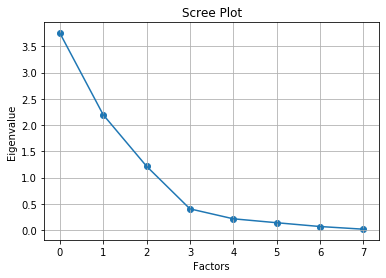

In [10]:
#确定公共因子的个数（根据碎石土判断）
# 可视化
# plot横轴是指标个数，纵轴是ev值
# scatter横轴是指标个数，纵轴是ev值
plt.scatter(range(8),eig['eig_value'])
plt.plot(range(8),eig['eig_value'])
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

根据碎石土可以判断：公共因子的个数可以选取4个

接着选择3个公共因子进行进一步的分析

In [11]:
#构造初始因子载荷矩阵A 
col0=list(sqrt(eig_value[0])*eig_vector[:,0]) #因子载荷矩阵第1列
col1=list(sqrt(eig_value[1])*eig_vector[:,1]) #因子载荷矩阵第2列
col2=list(sqrt(eig_value[2])*eig_vector[:,2]) #因子载荷矩阵第3列
A=pd.DataFrame([col0,col1,col2]).T #构造因子载荷矩阵A
A.columns=['factor1','factor2','factor3'] #因子载荷矩阵A的公共因子

Text(33.0, 0.5, 'Sepal Width')

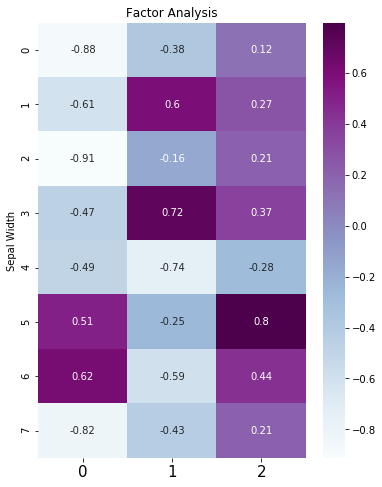

In [38]:
#对因子分析结果进行可视化。

fig,ax = plt.subplots(figsize=(6,8))
sns.heatmap(A,annot=True,cmap='BuPu',ax=ax)
# 设置y轴字体的大小
ax.tick_params(axis='x',labelsize=15)
ax.set_title("Factor Analysis",fontsize=12)
ax.set_ylabel("Sepal Width")

建立因子模型

In [13]:
h=np.zeros(8) #变量共同度，反映变量对共同因子的依赖程度，越接近1，说明公共因子解释程度越高，因子分析效果越好

D=np.mat(np.eye(8))#特殊因子方差，因子的方差贡献度 ，反映公共因子对变量的贡献，衡量公共因子的相对重要性

A=np.mat(A) #将因子载荷阵A矩阵化

for i in range(8):
    a=A[i,:]*A[i,:].T #行平方和
    h[i]=a[0,0]  #计算变量X共同度,描述全部公共因子F对变量X_i的总方差所做的贡献，及变量X_i方差中能够被全体因子解释的部分
    D[i,i]=1-a[0,0] #因为自变量矩阵已经标准化后的方差为1，即Var(X_i)=第i个共同度h_i + 第i个特殊因子方差

正交因子旋转旋转：每个原始变量都由某个因子主要决定（对应载荷 数值很大），而与其他因子关系不大（对应载荷接近0） 从几何的角度，因子旋转的目标，是让坐标轴靠近尽可能多的点

正交因子旋转地常用方法是最大方差法（varimax）:寻找最大化载荷矩阵中每一列载荷平方的方差的旋转载荷

In [14]:
#正交因子旋转
def varimax(Phi, gamma = 1.0, q =10, tol = 1e-6): #定义方差最大旋转函数
    p,k = Phi.shape #给出矩阵Phi的总行数，总列数
    R = np.eye(k) #给定一个k*k的单位矩阵
    d=0
    for i in range(q):
        d_old = d
        Lambda = np.dot(Phi, R)#矩阵乘法

        u,s,vh = np.linalg.svd(np.dot(Phi.T,np.asarray(Lambda)**3 - (gamma/p) * np.dot(Lambda, np.diag(np.diag(np.dot(Lambda.T,Lambda)))))) #奇异值分解svd

        R = np.dot(u,vh)#构造正交矩阵R

        d = np.sum(s)#奇异值求和

    if d_old!=0 and d/d_old:
        return np.dot(Phi, R)#返回旋转矩阵Phi*R

rotation_mat=varimax(A)#调用方差最大旋转函数
rotation_mat=pd.DataFrame(rotation_mat)#数据框化
rotation_mat.iloc[:,0]=-1*rotation_mat.iloc[:,0]

Text(33.0, 0.5, 'Sepal Width')

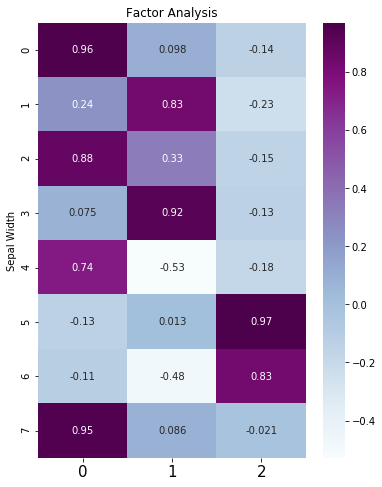

In [39]:
#将因子正交旋转后的载荷矩阵可视化
fig,ax = plt.subplots(figsize=(6,8))
sns.heatmap(rotation_mat,annot=True,cmap='BuPu',ax=ax)
# 设置y轴字体的大小
ax.tick_params(axis='x',labelsize=15)
ax.set_title("Factor Analysis",fontsize=12)
ax.set_ylabel("Sepal Width")

将正交旋转前和旋转后的载荷矩阵进行对比，可以看出：正交旋转后的载荷矩阵系数的绝对值更趋近于0或者1，即可以更清晰地看出每个变量主要由哪个因子决定。

计算因子得分(加权最小二乘法)

In [16]:
L=np.array(rotation_mat)
inv_D=np.linalg.inv(D)
L_D_L_inv=np.linalg.inv(np.dot(np.dot(L.T,inv_D),L))
L_D_Y=np.dot(np.dot(L.T,inv_D),np.array(data).T)
#factor_score=np.dot(np.dot(np.linalg.inv(np.dot(L.T,L)),L.T),np.array(data).T).T
factor_score=np.dot(L_D_L_inv,L_D_Y).T
factor_score=pd.DataFrame(factor_score)#数据框化

factor_score.columns=['Factor1','Factor2','Factor3'] #对因子变量进行命名
factor_score
#factor_score.to_excel(outputfile)#打印输出因子得分矩阵

,Factor1,Factor2,Factor3
0,-0.419829,1.747108,-0.208128
1,-0.910293,1.115530,-1.497865
2,1.018687,-1.653877,-0.769037
3,-0.416431,-0.699215,-0.172665
4,-0.547286,-1.009494,0.174555
5,0.841721,-0.563273,-0.570193
6,-0.536980,-0.541040,-1.018373
7,0.185224,-0.538789,-0.588718
8,0.548438,3.471458,0.757345
9,2.119942,0.190003,-0.299638


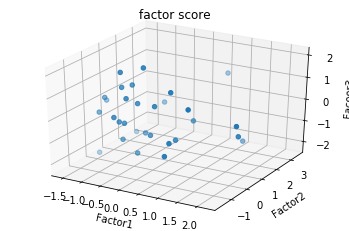

In [29]:
#可视化因子得分
ax = plt.figure(figsize=(6,4)).add_subplot(111, projection = '3d') 
#基于ax变量绘制三维图 
#xs表示x方向的变量 
#ys表示y方向的变量 
#zs表示z方向的变量，这三个方向上的变量都可以用list的形式表示 
#m表示点的形式，o是圆形的点，^是三角形（marker) 
#c表示颜色（color for short） 
ax.scatter(factor_score.iloc[:,0], factor_score.iloc[:,1], factor_score.iloc[:,2]) 
  
#设置坐标轴 
ax.set_xlabel('Factor1') 
ax.set_ylabel('Factor2') 
ax.set_zlabel('Facoor3') 

#设置标题
ax.set_title('factor score')
#显示图像 
plt.show()

### 调库实现因子分析

In [18]:
import numpy as np
import pandas as pd
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [19]:
#导入数据集
data1=pd.read_excel('factor analysis.xls',index_col='省市')
#调用sklearn 库对数据进行标准化
std = StandardScaler()
data_zs = std.fit_transform(data1)

确定公共因子的个数

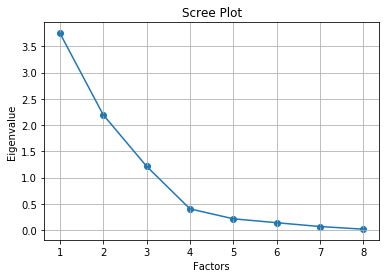

In [20]:
#训练因子分析模型
fa = FactorAnalyzer(rotation='varimax',method='principal')
fa.fit(data_zs)

ev,v = fa.get_eigenvalues()


# 可视化
# plot横轴是指标个数，纵轴是ev值
# scatter横轴是指标个数，纵轴是ev值

plt.scatter(range(1,data_zs.shape[1]+1),ev)
plt.plot(range(1,data_zs.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [21]:
# 给出贡献率,第一行表示特征值方差，第二行表示贡献率，第三行表示累计贡献率
#该过程与上述求方差贡献率结果一致
var = fa.get_factor_variance()  
for i in range(0,3):
    print(var[i])

[3.2053617  2.21802999 1.74336416]
[0.40067021 0.27725375 0.21792052]
[0.40067021 0.67792396 0.89584448]


根据累积贡献率可以看出，前三个公共因子的累积贡献率达到89.58%，已经解释了原始数据的绝大部分信息，因此选择三个公共因子进行分析,并进行正交因子旋转

Text(33.0, 0.5, 'Sepal Width')

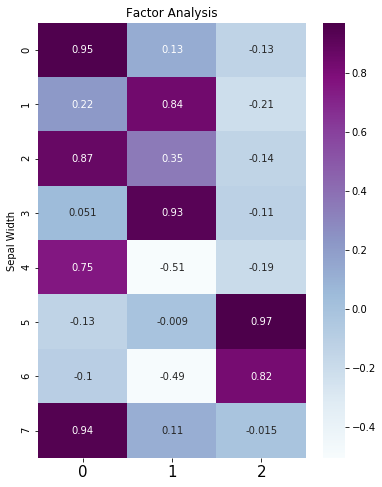

In [40]:
fa = FactorAnalyzer(3,method='principal',rotation='varimax')
fa.fit(data_zs)

# # 8*3(变量个数*因子个数)
#因子载荷
fa.loadings_
#可视化因子载荷
fig,ax = plt.subplots(figsize=(6,8))
sns.heatmap(fa.loadings_,annot=True,cmap='BuPu',ax=ax)
# 设置y轴字体的大小
ax.tick_params(axis='x',labelsize=15)
ax.set_title("Factor Analysis",fontsize=12)
ax.set_ylabel("Sepal Width")

计算因子得分并可视化

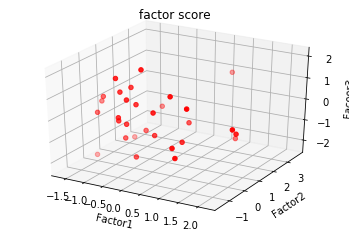

In [32]:
#计算因子得分
fa_score=fa.transform(data_zs)

#可视化因子得分
ax = plt.figure(figsize=(6,4)).add_subplot(111, projection = '3d') 
#基于ax变量绘制三维图 
#xs表示x方向的变量 
#ys表示y方向的变量 
#zs表示z方向的变量，这三个方向上的变量都可以用list的形式表示  
#c表示颜色（color for short） 
ax.scatter(fa_score[:,0], fa_score[:,1], fa_score[:,2], c = 'r') #点为红色

#设置坐标轴 
ax.set_xlabel('Factor1') 
ax.set_ylabel('Factor2') 
ax.set_zlabel('Facoor3') 

#设置标题
ax.set_title('factor score')
#显示图像 
plt.show()

#### 因子分析本质上可以是一种降维的算法，因为所选择的少数的几个公共因子已经包含了原始数据的绝大部分信息，接下来可以在所选择的公共因子上进行分析。